In [1]:
!pip install kaggle

In [2]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# dataset api
!kaggle datasets download -d vaishnaviasonawane/indian-sign-language-dataset

 96% 257M/268M [00:01<00:00, 189MB/s]
100% 268M/268M [00:01<00:00, 189MB/s]


In [4]:
!ls

indian-sign-language-dataset.zip  kaggle.json  sample_data


In [5]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/indian-sign-language-dataset.zip'

with ZipFile(dataset,'r') as zip :
  zip.extractall()
  print("THE DATASET IS EXTRACTED")

THE DATASET IS EXTRACTED


In [6]:
!ls

data  indian-sign-language-dataset.zip	kaggle.json  sample_data


In [7]:
!ls data

1  3  5  7  9  B  D  F	H  J  L  N  P  R  T  V	X  Z
2  4  6  8  A  C  E  G	I  K  M  O  Q  S  U  W	Y


In [8]:
!ls data/1

0.jpg	  1108.jpg  136.jpg  244.jpg  352.jpg  460.jpg	569.jpg  677.jpg  785.jpg  893.jpg
1000.jpg  1109.jpg  137.jpg  245.jpg  353.jpg  461.jpg	56.jpg	 678.jpg  786.jpg  894.jpg
1001.jpg  110.jpg   138.jpg  246.jpg  354.jpg  462.jpg	570.jpg  679.jpg  787.jpg  895.jpg
1002.jpg  1110.jpg  139.jpg  247.jpg  355.jpg  463.jpg	571.jpg  67.jpg   788.jpg  896.jpg
1003.jpg  1111.jpg  13.jpg   248.jpg  356.jpg  464.jpg	572.jpg  680.jpg  789.jpg  897.jpg
1004.jpg  1112.jpg  140.jpg  249.jpg  357.jpg  465.jpg	573.jpg  681.jpg  78.jpg   898.jpg
1005.jpg  1113.jpg  141.jpg  24.jpg   358.jpg  466.jpg	574.jpg  682.jpg  790.jpg  899.jpg
1006.jpg  1114.jpg  142.jpg  250.jpg  359.jpg  467.jpg	575.jpg  683.jpg  791.jpg  89.jpg
1007.jpg  1115.jpg  143.jpg  251.jpg  35.jpg   468.jpg	576.jpg  684.jpg  792.jpg  8.jpg
1008.jpg  1116.jpg  144.jpg  252.jpg  360.jpg  469.jpg	577.jpg  685.jpg  793.jpg  900.jpg
1009.jpg  1117.jpg  145.jpg  253.jpg  361.jpg  46.jpg	578.jpg  686.jpg  794.jpg  901.jpg
100.jpg   1118.jp

**Importing the Dependencies**

In [9]:
import cv2
import os
import random
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img,  img_to_array, array_to_img
import keras.utils as image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix



**Total Images**

In [10]:

base_dir = 'data/'

# List all subdirectories
subdirectories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

total_images = 0

# Iterate through the subdirectories
for subdirectory_name in subdirectories:
    subdirectory_path = os.path.join(base_dir, subdirectory_name)

    # Count the number of image files in each subdirectory
    image_files = [file for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, file))]
    total_images += len(image_files)

# Print the total number of images in the dataset
print(f'Total number of images in the dataset: {total_images}')

Total number of images in the dataset: 42000




*   Displaying the images
*   Resizing the images
*   Normalization of images
*   Grayscale conversion of images
*   Edge Detection of images


In [11]:

# Define the directory where the preprocessed images are saved
base_dir = 'data/'

# Define the total number of images to keep
total_images_to_keep = 5000

# Create a list to store the paths of all images
all_image_paths = []

# Loop through subdirectories
for subdirectory_name in os.listdir(base_dir):
    subdirectory_path = os.path.join(base_dir, subdirectory_name)

    # Loop through images in subdirectory
    for filename in os.listdir(subdirectory_path):
        image_path = os.path.join(subdirectory_path, filename)
        all_image_paths.append(image_path)

# Shuffle the list of image paths
np.random.shuffle(all_image_paths)

# Keep only the first 5000 paths
selected_image_paths = all_image_paths[:total_images_to_keep]

# Delete the rest of the images
for image_path in all_image_paths:
    if image_path not in selected_image_paths:
        os.remove(image_path)

print("Image selection complete.")


Image selection complete.


In [12]:
# testing images
base_dir = 'data/'

# List all subdirectories
subdirectories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

total_images = 0

# Iterate through the subdirectories
for subdirectory_name in subdirectories:
    subdirectory_path = os.path.join(base_dir, subdirectory_name)

    # Count the number of image files in each subdirectory
    image_files = [file for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, file))]
    total_images += len(image_files)

# Print the total number of images in the dataset
print(f'Total number of images in the dataset: {total_images}')

Total number of images in the dataset: 5000


In [13]:
class ImageProcessing :

  def __init__(self, base_dir = 'data/') :
    self.base_dir = base_dir

  def list_subdirectories(self) :
    return [d for d in os.listdir(self.base_dir) if os.path.isdir(os.path.join(self.base_dir,d))]

  def display_first_image(self, subdirectory_name) :
    subdirectory_path = os.path.join(self.base_dir, subdirectory_name)
    image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, file))]


    if image_files :
      first_image_path = image_files[0]
      img = image.load_img(first_image_path)
      img_width, img_height = img.size

      plt.imshow(img)
      plt.title(f"Image Dimensions : {img_width}x{img_height}")
      plt.axis('on')
      plt.show()
    else :
      print("No image files foung in the subdirectory")


  # resizing the image
  def resize_images(self, width=256, height=256):
        datagen = ImageDataGenerator(
            rescale=1./255,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=0.2,
            rotation_range=20
        )

        for root, dirs, files in os.walk(self.base_dir):
            for file in files:
                image_path = os.path.join(root, file)
                img = load_img(image_path)
                img = img_to_array(img)
                img = datagen.random_transform(img)
                array_to_img(img).save(image_path)

        print('All images resized.')


  # Edge Detection of Images
  def edge_detection(self) :
    subdirectories = self.list_subdirectories()

    for subdirectory_name in subdirectories :
      subdirectory_path = os.path.join(self.base_dir, subdirectory_name)
      image_files = [os.path.join(subdirectory_path,file) for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path,file))]

      if image_files :
        for image_path in image_files :
          img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
          edges = cv2.Canny(img,100,200)
          edges = cv2.cvtColor(edges,cv2.COLOR_GRAY2BGR)
          cv2.imwrite(image_path,edges)

    print('Edge detection and saving complete')

  # Converting to grayscale
  def convert_to_grayscale(self):

        # Directory containing your subdirectories
    base_dir = 'data/'

    # List all subdirectories
    subdirectories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

    # Iterate through the subdirectories
    for subdirectory_name in subdirectories:
        # Combine the base directory and subdirectory path
        subdirectory_path = os.path.join(base_dir, subdirectory_name)

        # List all image files in the specified subdirectory
        image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, file))]

        # Check if there are any image files in the subdirectory
        if image_files:
            print(f"Subdirectory: {subdirectory_name}")

            for image_path in image_files:

                # Load the image using Keras
                img = image.load_img(image_path)

                # Convert the image to grayscale using OpenCV
                img_gray = cv2.cvtColor(image.img_to_array(img), cv2.COLOR_RGB2GRAY)

                # Save the grayscale image back to the original location
                cv2.imwrite(image_path, img_gray)

    print("Grayscale conversion and saving completed.")


  def normalize_images(self) :

    datagen = ImageDataGenerator(rescale=1./255)

    for root, dirs, files in os.walk(self.base_dir) :

      for file in files :

        image_path = os.path.join(root,file)
        img = load_img(image_path)
        img = img_to_array(img)
        img = datagen.standardize(img)

        array_to_img(img).save(image_path)

    print('Image Normalization Complete')



In [14]:
image_processing = ImageProcessing()
subdirectories = image_processing.list_subdirectories()

Display the first image from a subdirectory

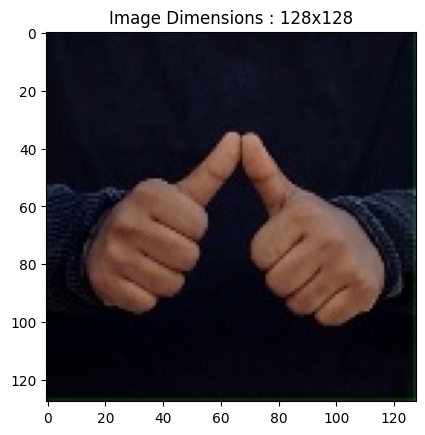

In [15]:
subdirectory_name = 'A'
image_processing.display_first_image(subdirectory_name)

The result was so bad after applying resizing the images and normalization and edge detection causing the information loss

In [16]:
class GestureRecognition :
  def __init__(self, base_dir = 'data/') :
    self.base_dir = base_dir

  def detect_hand(self, image) :

    # convert the images to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # apply gaussian blur to reduce blur
    blurred_image = cv2.GaussianBlur(gray_image, (5,5), 0)

    # threshold the image to create a binary mask
    _ , binary_mask = cv2.threshold(blurred_image,0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours :
      max_contour = max(contours, key = cv2.contourArea)

      # create a mask for the maximum connected region(hand)

      mask = np.zeros_like(binary_mask)
      cv2.drawContours(mask, [max_contour], -1, (255), thickness = cv2.FILLED)

      # extract the hand using the mask
      segmented_hand = cv2.bitwise_and(image, image, mask=mask)

      # remove noise using morphological operations (erosion and dellusion)
      # kernel = np.ones((5,5), np.unit8)
      kernel = np.ones((5, 5), np.uint8)
      morphological_result =  cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

      return segmented_hand, morphological_result

    else :
      return None, None

  def display_hand_detection(self, original_image, segmented_hand, morphological_result):
        # Display the original image, segmented hand, and cleaned result
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.title('Segmented Hand')
        plt.imshow(cv2.cvtColor(segmented_hand, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title('Morphological Result')
        plt.imshow(morphological_result, cmap='gray')
        plt.axis('off')

        plt.show()

  def detect_and_display_hands(self, subdirectory_name):
    subdirectory_path = os.path.join(self.base_dir, subdirectory_name)

    # List all image files in the specified subdirectory
    image_files = [file for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, file))]

    # Iterate through the image files
    for image_file in image_files:
        # Load the original image
        image_path = os.path.join(subdirectory_path, image_file)
        original_image = cv2.imread(image_path)

        # Detect hand in the image
        segmented_hand, morphological_result = self.detect_hand(original_image)

        # Display hand detection results
        if segmented_hand is not None:
            self.display_hand_detection(original_image, segmented_hand, morphological_result)
        else:
            print(f"No hand detected in the image: {image_path}")


In [17]:
hand_detector = GestureRecognition()

In [18]:
# hand_detector.detect_and_display_hands('1')

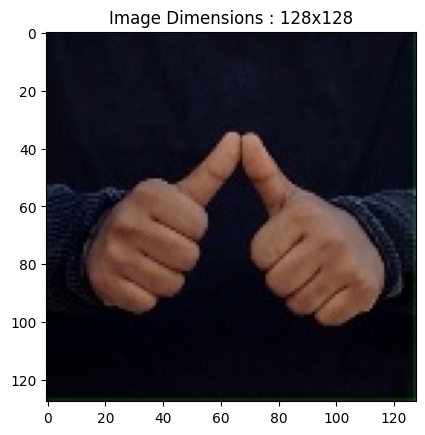

In [19]:
subdirectory_name = 'A'
image_processing.display_first_image(subdirectory_name)

In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ImageProcessing:

    def __init__(self, base_dir='data/'):
        self.base_dir = base_dir

    def list_subdirectories(self):
        return [d for d in os.listdir(self.base_dir) if os.path.isdir(os.path.join(self.base_dir, d))]

    def display_first_image(self, subdirectory_name):
        subdirectory_path = os.path.join(self.base_dir, subdirectory_name)
        image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path) if
                        os.path.isfile(os.path.join(subdirectory_path, file))]

        if image_files:
            first_image_path = image_files[0]
            img = cv2.imread(first_image_path)
            img_width, img_height, _ = img.shape

            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f"Image Dimensions : {img_width}x{img_height}")
            plt.axis('on')
            plt.show()
        else:
            print("No image files found in the subdirectory")

    def resize_images(self, width=256, height=256):
        datagen = cv2.resize

        for root, dirs, files in os.walk(self.base_dir):
            for file in files:
                image_path = os.path.join(root, file)
                img = cv2.imread(image_path)
                img = cv2.resize(img, (width, height))
                cv2.imwrite(image_path, img)

        print('All images resized.')

    def convert_to_grayscale(self):
        subdirectories = self.list_subdirectories()

        for subdirectory_name in subdirectories:
            subdirectory_path = os.path.join(self.base_dir, subdirectory_name)
            image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path) if
                            os.path.isfile(os.path.join(subdirectory_path, file))]

            if image_files:
                for image_path in image_files:
                    img = cv2.imread(image_path)
                    if len(img.shape) == 3 and img.shape[2] == 3:
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                    cv2.imwrite(image_path, img)

        print("Grayscale conversion and saving completed.")

    def detect_and_display_hands(self):
        for root, dirs, files in os.walk(self.base_dir):
            for file in files:
                image_path = os.path.join(root, file)
                original_image = cv2.imread(image_path)

                gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
                blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
                _, binary_mask = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
                contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                if contours:
                    max_contour = max(contours, key=cv2.contourArea)
                    mask = np.zeros_like(binary_mask)
                    cv2.drawContours(mask, [max_contour], -1, (255), thickness=cv2.FILLED)
                    segmented_hand = cv2.bitwise_and(original_image, original_image, mask=mask)
                    kernel = np.ones((5, 5), np.uint8)
                    morphological_result = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

                    # Save the processed images back to the original location
                    cv2.imwrite(image_path.replace('.jpg', '_segmented.jpg'), segmented_hand)
                    cv2.imwrite(image_path.replace('.jpg', '_morphological_result.jpg'), morphological_result)

        print("Hand detection and saving completed.")

# Example Usage:
image_processing = ImageProcessing()

# Resize images
image_processing.resize_images(width=256, height=256)

# Convert to grayscale
image_processing.convert_to_grayscale()

# Detect and display hands
image_processing.detect_and_display_hands()


All images resized.
Grayscale conversion and saving completed.
Hand detection and saving completed.


In [21]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ImageProcessing:

    def __init__(self, base_dir='data/'):
        self.base_dir = base_dir

    def list_subdirectories(self):
        return [d for d in os.listdir(self.base_dir) if os.path.isdir(os.path.join(self.base_dir, d))]

    def display_first_image(self, subdirectory_name):
        subdirectory_path = os.path.join(self.base_dir, subdirectory_name)
        image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path) if
                        os.path.isfile(os.path.join(subdirectory_path, file))]

        if image_files:
            first_image_path = image_files[0]
            img = cv2.imread(first_image_path)
            img_width, img_height, _ = img.shape

            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f"Image Dimensions : {img_width}x{img_height}")
            plt.axis('on')
            plt.show()
        else:
            print("No image files found in the subdirectory")

    def convert_to_grayscale(self):
        subdirectories = self.list_subdirectories()

        for subdirectory_name in subdirectories:
            subdirectory_path = os.path.join(self.base_dir, subdirectory_name)
            image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path) if
                            os.path.isfile(os.path.join(subdirectory_path, file))]

            if image_files:
                for image_path in image_files:
                    img = cv2.imread(image_path)
                    if len(img.shape) == 3 and img.shape[2] == 3:
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                    cv2.imwrite(image_path, img)

        print("Grayscale conversion and saving completed.")

    def detect_and_display_hands(self):
        for root, dirs, files in os.walk(self.base_dir):
            for file in files:
                image_path = os.path.join(root, file)
                original_image = cv2.imread(image_path)

                gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
                blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
                _, binary_mask = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
                contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                if contours:
                    max_contour = max(contours, key=cv2.contourArea)
                    mask = np.zeros_like(binary_mask)
                    cv2.drawContours(mask, [max_contour], -1, (255), thickness=cv2.FILLED)
                    segmented_hand = cv2.bitwise_and(original_image, original_image, mask=mask)
                    kernel = np.ones((5, 5), np.uint8)
                    morphological_result = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

                    # Save the processed images back to the original location
                    cv2.imwrite(image_path.replace('.jpg', '_segmented.jpg'), segmented_hand)
                    cv2.imwrite(image_path.replace('.jpg', '_morphological_result.jpg'), morphological_result)

        print("Hand detection and saving completed.")

# Example Usage:
image_processing = ImageProcessing()

# Convert to grayscale
image_processing.convert_to_grayscale()

# Detect and display hands
image_processing.detect_and_display_hands()


Grayscale conversion and saving completed.
Hand detection and saving completed.


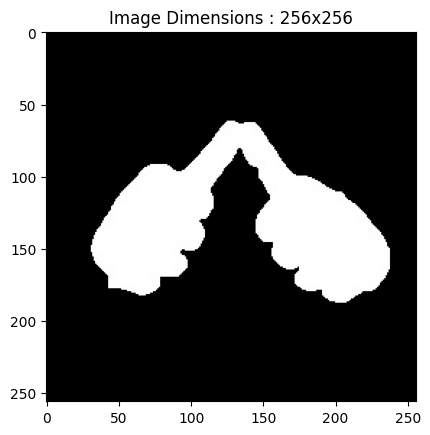

In [22]:
subdirectory_name = 'A'
image_processing.display_first_image(subdirectory_name)

In [23]:
class EdgeDetection:

    def __init__(self, base_dir='data/'):
        self.base_dir = base_dir

    def apply_edge_detection(self):
        for root, dirs, files in os.walk(self.base_dir):
            for file in files:
                image_path = os.path.join(root, file)
                original_image = cv2.imread(image_path)

                # Apply Gaussian blur to reduce noise
                blurred_image = cv2.GaussianBlur(original_image, (5, 5), 0)

                # Apply Canny edge detection
                edges = cv2.Canny(blurred_image, 50, 150)

                # Save the edge-detected image back to the original location
                edge_path = image_path.replace('.jpg', '_edges.jpg')
                cv2.imwrite(edge_path, edges)



In [24]:

# Create an instance of the EdgeDetection class
edge_detector = EdgeDetection(base_dir='data/')

# Apply edge detection
edge_detector.apply_edge_detection()

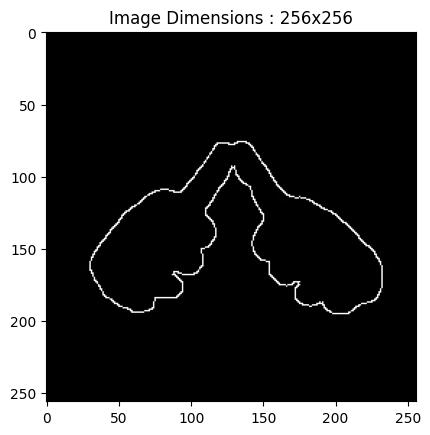

In [25]:
subdirectory_name = 'A'
image_processing.display_first_image(subdirectory_name)

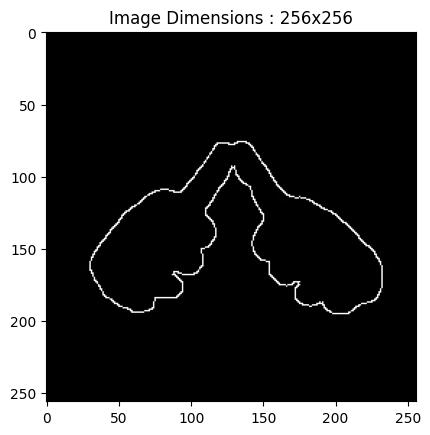

In [26]:
subdirectory_name = 'A'
image_processing.display_first_image(subdirectory_name)

In [ ]:

# Define the directory where preprocessed images are saved
base_dir = 'data/'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through subdirectories to load images and labels
for subdirectory_name in os.listdir(base_dir):
    subdirectory_path = os.path.join(base_dir, subdirectory_name)
    for filename in os.listdir(subdirectory_path):
        img_path = os.path.join(subdirectory_path, filename)
        # Load image
        img = cv2.imread(img_path)
        # Normalize pixel values
        img = img / 255.0
        # Resize image to 100x100 pixels (adjust size as needed)
        img = cv2.resize(img, (100, 100))
        # Append image to the list
        images.append(img)
        # Append label to the list
        labels.append(subdirectory_name)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Encode labels into numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)


In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define CNN model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))  # 26 classes for the 26 alphabets in ISL


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Define callbacks for early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])



In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Predict labels for test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate and print classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_true, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred))
